In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# PREPARE

In [0]:
!ln -s "/content/gdrive/My Drive/Darknet/" /mydrive #symbolic link
#!ls /mydrive

In [3]:
!/usr/local/cuda/bin/nvcc --version # check cuda version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [4]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf /mydrive/cuDNN/cudnn-10.0-linux-x64-v7.6.4.38.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.4
cuda/lib64/libcudnn_static.a


In [5]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/kriyeng/darknet/
%cd darknet

#Check the folder
#!ls

# I have a branch where I have done the changes commented above
#!git checkout feature/google-colab

#Compile Darknet
#!make

#Copies the Darknet compiled version to Google drive
#!cp -r ./ /mydrive/darknet

[Errno 2] No such file or directory: 'darknet'
/content


In [6]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive
!mkdir darknet
%cd darknet

# Copy the Darkent compiled version to the VM local drive
!cp /mydrive/darknet/darknet ./

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/darknet


In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# Not necessary cell
# Get yolov3 weights
# !wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
# imShow('predictions.jpg')

In [10]:
# Copy the Darkent compiled version to the VM local drive
#%cd ./build/darknet/x64
#!cp /mydrive/darknet/darknet ./
# Set execution permissions to Darknet
#!chmod +x ./darknet

!mkdir ./data
!mkdir ./data/obj
!mkdir ./backup

!cp  /mydrive/darknet/build/darknet/x64/darknet53.conv.74 ./
!cp  /mydrive/darknet/build/darknet/x64/yolo-obj.cfg ./
!cp  /mydrive/darknet/build/darknet/x64/data/* ./data
!cp  /mydrive/darknet/build/darknet/x64/data/obj/* ./data/obj
!cp  /mydrive/backup/* ./backup

!mkdir ./cfg
!cp ./data/coco.data ./cfg
!cp ./data/coco.names ./cfg

!mkdir ./data/test
!cp /mydrive/darknet/build/darknet/x64/data/test/* ./data/test

!mkdir data/labels
!cp -r /mydrive/darknet/build/darknet/x64/data/labels data/

!mv data/coco.names data/obj.names

!git clone https://github.com/Ariello05/Data ./git
!mkdir ./data/images
!mkdir ./data/films
!mv ./git/images/* ./data/images #images2 
!mv ./git/film/* ./data/films

cp: -r not specified; omitting directory '/mydrive/darknet/build/darknet/x64/data/labels'
cp: -r not specified; omitting directory '/mydrive/darknet/build/darknet/x64/data/obj'
cp: -r not specified; omitting directory '/mydrive/darknet/build/darknet/x64/data/test'
cp: -r not specified; omitting directory '/mydrive/darknet/build/darknet/x64/data/voc'
Cloning into './git'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 286 (delta 0), reused 8 (delta 0), pack-reused 277
Receiving objects: 100% (286/286), 160.67 MiB | 32.48 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [11]:
# don't go beyond here with Run All
 assert False

AssertionError: ignored

# TRAIN

In [0]:

!./darknet detector train data/coco.data yolo-obj.cfg backup/yolo-obj_last.weights -dont_show 


# DETECT

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

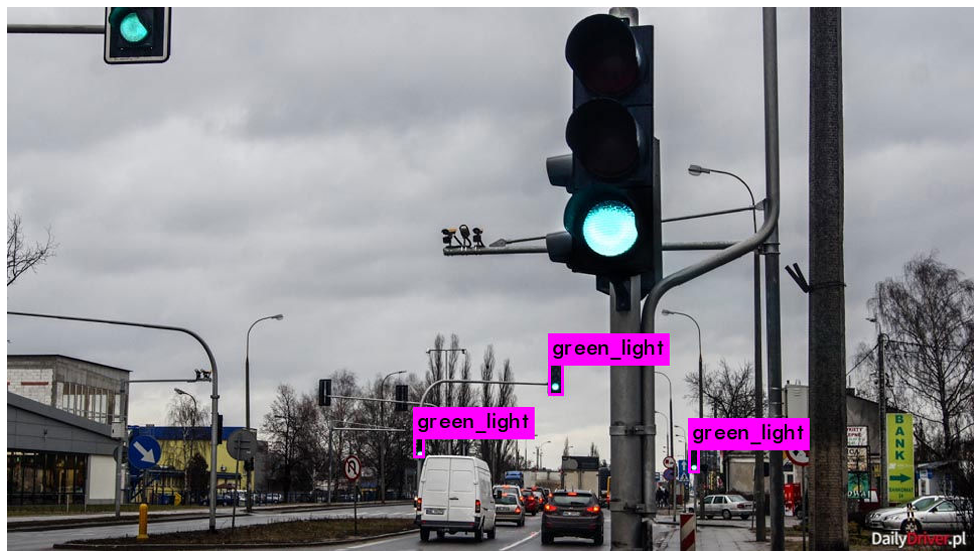

In [19]:
!./darknet detector test cfg/coco.data yolo-obj.cfg backup/yolo-obj_last.weights ./data/zielone.jpg -thresh 0.5
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

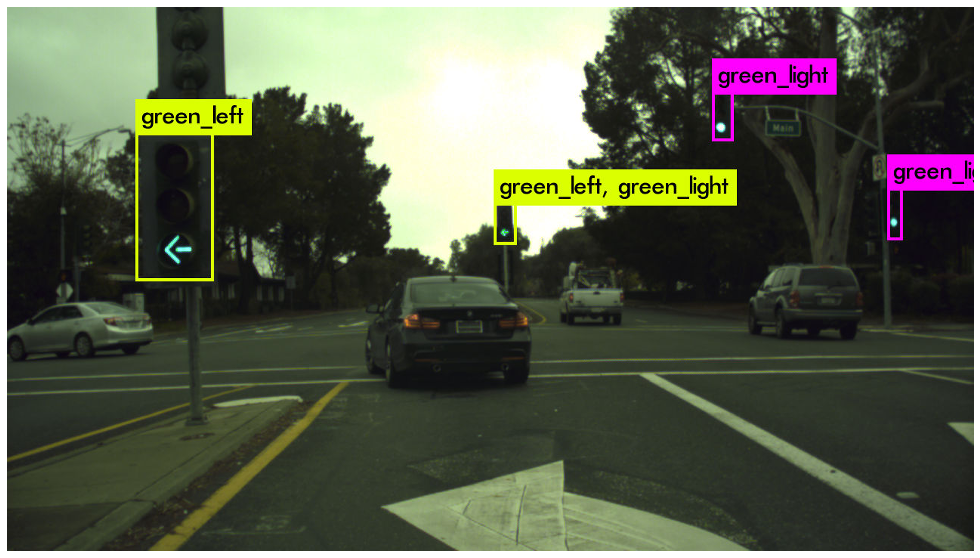

In [16]:
!./darknet detect yolo-obj.cfg backup/yolo-obj_last.weights data/test/img003.png -dont-show -thresh 0.1
imShow('predictions.jpg')

In [0]:
!./darknet detector demo cfg/coco.data yolo-obj.cfg backup/yolo-obj_1000.weights -dont_show ./data/films/turnleft.mp4 -i 0 -out_filename res.avi -thresh 0.25


# Workspace

In [0]:
!rm ./data/train.txt
!cp /mydrive/darknet/build/darknet/x64/data/train.txt ./data/train.txt

In [0]:
!cat ./data/train.txt
!ls ./img/images/

In [0]:
!mv ./data/images/images/* ./data/images
!mv ./data/films/film/* ./data/films

In [0]:
!git clone https://github.com/Ariello05/Data ./git2
!mkdir ./data/images
!mkdir ./data/films
!mv ./git2/images/* ./data/images #images2 
!mv ./git2/film/* ./data/films

In [0]:
download('res.avi')

In [0]:
!cp res.avi /mydrive

In [0]:
!cp  /mydrive/backup/* ./backup


In [0]:
!cat /mydrive/darknet/build/darknet/x64/data/coco.data